In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('HR.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [ ]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
3309,0.41,0.87,6,262,6,0,0,0,sales,high
10645,0.78,0.52,5,192,3,1,0,0,technical,low
2760,0.54,0.49,4,152,3,1,0,0,sales,medium
7617,0.59,0.56,5,162,4,0,0,0,IT,low
13855,0.90,0.85,3,158,7,0,0,0,marketing,medium
9996,0.97,0.55,4,166,3,1,0,0,accounting,high
3664,0.55,0.82,3,248,2,0,0,0,accounting,high
1653,0.10,0.88,7,282,4,0,1,0,support,low
5966,0.70,0.48,5,273,2,0,0,0,sales,medium
4831,0.98,0.75,5,188,2,0,0,0,sales,low


In [ ]:
df.shape

(14999, 10)

In [ ]:
df.isna().sum().sum()

0

**We do nat have missing values**

In [ ]:
# Identify Features in Columns
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3])

In [ ]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [ ]:
df['left'].unique()

array([1, 0])

In [ ]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
df['promotion_last_5years'].unique()

array([0, 1])

**Step 2 -> Exploratory Data Analysis**

In [ ]:
df.corr().round(2)

<ipython-input-21-1b12ae3e9d93>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


<ipython-input-22-7ca299465c7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2),annot=True)


<Axes: >

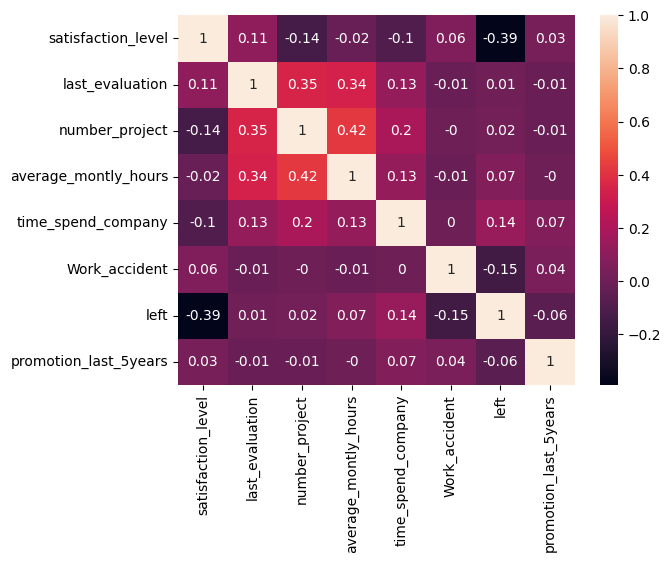

In [ ]:
sns.heatmap(df.corr().round(2),annot=True)

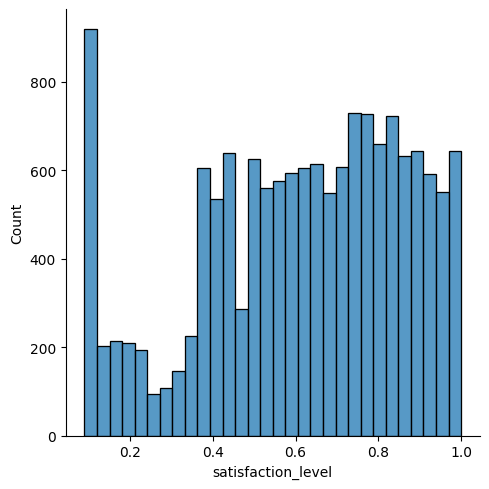

In [ ]:
sns.displot(df['satisfaction_level'])
plt.show()

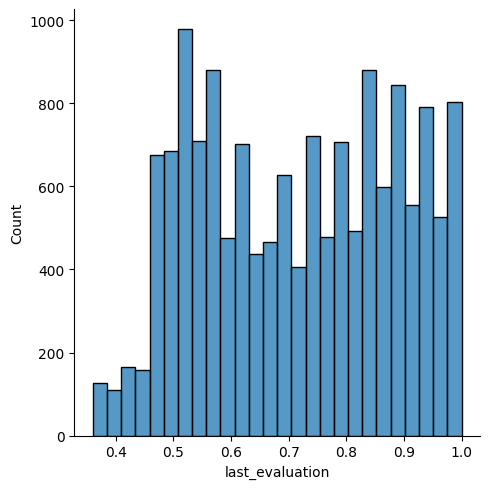

In [ ]:
sns.displot(df['last_evaluation'])
plt.show()

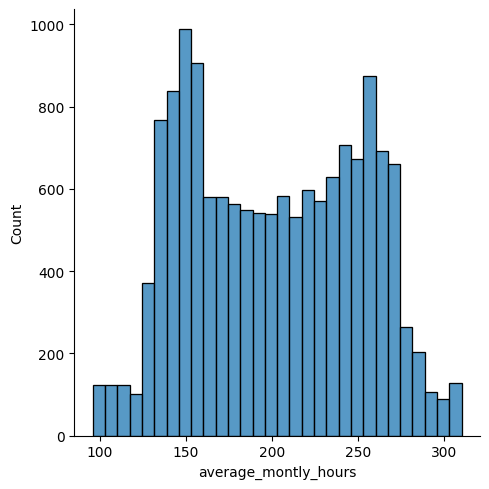

In [ ]:
sns.displot(df.average_montly_hours)
plt.show()

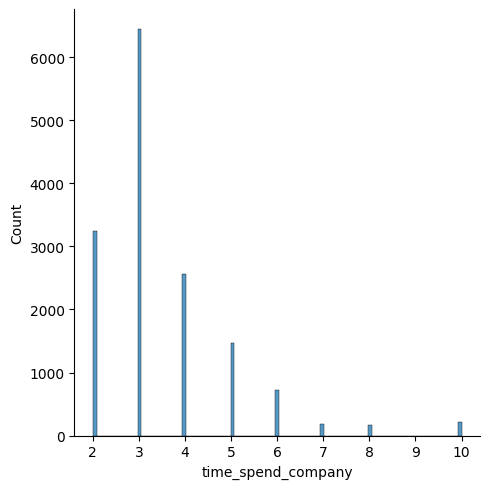

In [ ]:
sns.displot(df.time_spend_company)
plt.show()

In [ ]:
# dept wise left / stay
df.groupby(['sales'])['left'].value_counts().unstack()


left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Axes: xlabel='sales'>

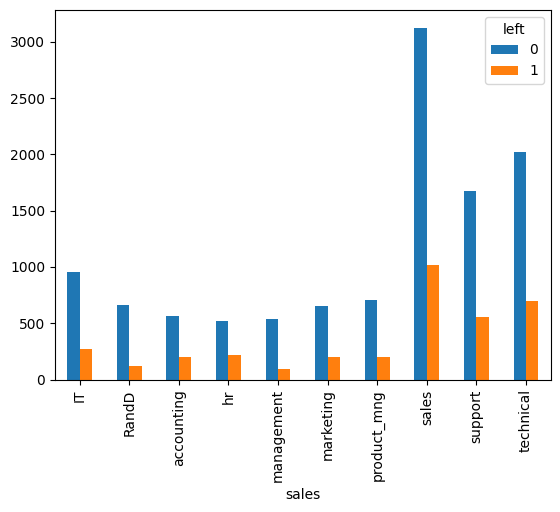

In [ ]:
df.groupby(['sales'])['left'].value_counts().unstack().plot.bar()

In [ ]:
df.groupby(['number_project'])['left'].value_counts().unstack()

left,0,1
number_project,,
2,821.0,1567.0
3,3983.0,72.0
4,3956.0,409.0
5,2149.0,612.0
6,519.0,655.0
7,NaN,256.0


<Axes: xlabel='number_project'>

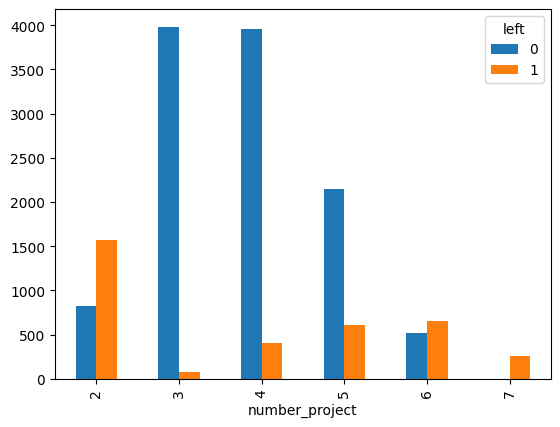

In [ ]:
df.groupby(['number_project'])['left'].value_counts().unstack().plot.bar()

In [ ]:
df.groupby(['salary'])['left'].value_counts().unstack()

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<Axes: xlabel='salary'>

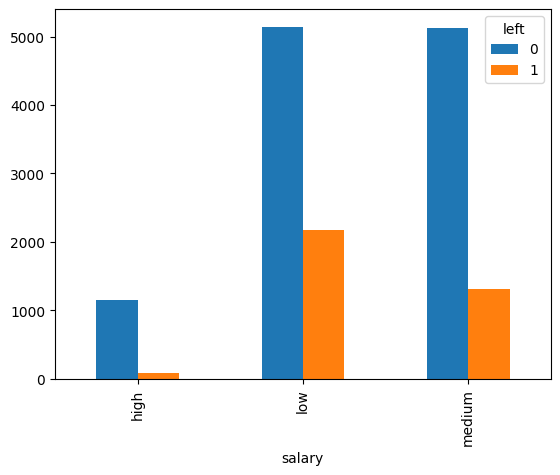

In [ ]:
df.groupby(['salary'])['left'].value_counts().unstack().plot.bar()

In [ ]:
dfclus=df[['satisfaction_level','last_evaluation','left']]

In [ ]:
dfclus.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km=KMeans(n_clusters=3,max_iter=3000)
labels=km.fit_predict(dfclus)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [ ]:
dfclus[labels==0].describe()

,satisfaction_level,last_evaluation,left
count,6732.000000,6732.000000,6732.0
mean,0.812757,0.739898,0.0
std,0.108398,0.154861,0.0
min,0.590000,0.360000,0.0
25%,0.720000,0.610000,0.0
50%,0.810000,0.740000,0.0
75%,0.910000,0.870000,0.0
max,1.000000,1.000000,0.0


In [ ]:
dfclus[labels==1].describe()

,satisfaction_level,last_evaluation,left
count,3571.000000,3571.000000,3571.0
mean,0.440098,0.718113,1.0
std,0.263933,0.197673,0.0
min,0.090000,0.450000,1.0
25%,0.130000,0.520000,1.0
50%,0.410000,0.790000,1.0
75%,0.730000,0.900000,1.0
max,0.920000,1.000000,1.0


In [ ]:
dfclus[labels==2].describe()

,satisfaction_level,last_evaluation,left
count,4696.000000,4696.000000,4696.0
mean,0.457585,0.680460,0.0
std,0.153447,0.165575,0.0
min,0.120000,0.360000,0.0
25%,0.350000,0.550000,0.0
50%,0.510000,0.670000,0.0
75%,0.570000,0.810000,0.0
max,0.690000,1.000000,0.0


In [ ]:
km1=dfclus.iloc[:,:].values
kmeans=KMeans(n_clusters=3,random_state=0)
label=kmeans.fit_predict(dfclus)
labelarr=kmeans.fit_predict(km1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
km1[label==1, :]

array([[0.38, 0.53, 1.  ],
       [0.8 , 0.86, 1.  ],
       [0.11, 0.88, 1.  ],
       ...,
       [0.37, 0.53, 1.  ],
       [0.11, 0.96, 1.  ],
       [0.37, 0.52, 1.  ]])

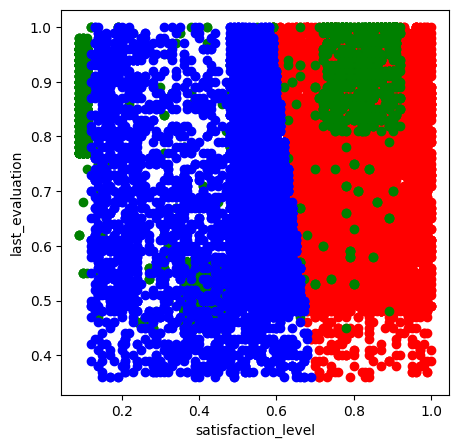

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(km1[label==0, 0],km1[label==0, 1],color='red',)
plt.scatter(km1[label==1, 0],km1[label==1, 1],color='green')
plt.scatter(km1[label==2, 0],km1[label==2, 1],color='blue')

plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.show()

**RED (label 0)**  -> Red cluster denotes those employees with high satisfaction level and score high in last evaluation.

**GREEN (label 1)** -> Green cluster denotes those employees with median satisfaction level and scored avrage to high in last evaluation.

**BLUE (label 2)** -> Blue cluster denotes those employees with low satisfaction level and scored more than above cluster in last evaluation

In [ ]:
# pre processing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df_num=df.select_dtypes(include=['float64','int64'])
df_cat=df.select_dtypes(include='object')

In [ ]:
df_cat=pd.get_dummies(df_cat)

In [ ]:
df_cat

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
df_final=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_final

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
x=df_final.drop('left',axis=1)
y=df['left']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11999, 20), (3000, 20), (11999,), (3000,))

In [ ]:
y_train.value_counts()

0    9137
1    2862
Name: left, dtype: int64

**Data is highly imbalanced for training dataset since the records of left are very low as compared to records od stay Using 'SMOTE' we will handle data imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm=SMOTE(random_state=2)
x_train1,y_train1=sm.fit_resample(x_train,y_train)

In [ ]:
y_train1.value_counts()

0    9137
1    9137
Name: left, dtype: int64

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as mat

In [ ]:
lr=LogisticRegression(max_iter=20000)

In [ ]:
lr.fit(x_train1,y_train1)

LogisticRegression(max_iter=20000)

In [ ]:
pred_lr=lr.predict(x_test)

In [ ]:
mat.accuracy_score(y_test,pred_lr)

0.7706666666666667

In [ ]:
mat.confusion_matrix(y_test,pred_lr)

array([[1831,  460],
       [ 228,  481]])

In [ ]:
print(mat.classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2291
           1       0.51      0.68      0.58       709

    accuracy                           0.77      3000
   macro avg       0.70      0.74      0.71      3000
weighted avg       0.80      0.77      0.78      3000



In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train1,y_train1)

RandomForestClassifier()

In [ ]:
pred_rfc=rfc.predict(x_test)

In [ ]:
mat.accuracy_score(y_test,pred_rfc)

0.9903333333333333

In [ ]:
mat.confusion_matrix(y_test,pred_rfc)

array([[2277,   14],
       [  15,  694]])

In [ ]:
print(mat.classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2291
           1       0.98      0.98      0.98       709

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

